

---

---



---



##Name : MAHADEV AJAGALLA

##Sch.No.: 222115110

##Lab Assignment 3

##Date: 20-Jan-2023



---



---



##1) Write a python program to find the suitable linear regression lines using least square method for the given datasets in “datasets_lab4.csv.”


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_excel('/content/datasets_lab4.xlsx',0)
df2 = pd.read_excel('/content/datasets_lab4.xlsx',1)
df3 = pd.read_excel('/content/datasets_lab4.xlsx',2)
df1


,x1,y
0,5,99
1,7,86
2,8,87
3,2,100
4,17,86
5,9,87
6,4,94
7,11,78
8,12,77
9,6,86


In [ ]:
df2

,x1,x2,y
0,2,1,10
1,0,3,3
2,12,8,44
3,14,0,49
4,4,6,18
5,11,4,41
6,19,7,68
7,7,13,32
8,6,14,32
9,5,4,21


In [ ]:
df3

,x1,x2,x3,x4,y
0,21,13,12,15,102
1,16,4,9,18,75
2,0,1,1,7,14
3,9,4,4,5,40
4,5,6,2,16,45
5,13,10,0,7,48
6,8,7,15,3,81
7,1,0,6,2,30
8,9,4,0,9,31
9,7,0,5,9,39


In [ ]:
df1_x = df1.drop(["y"],axis=1)
df1_y = df1.drop(["x1"],axis=1)
df2_x = df2.drop(["y"],axis=1)
df2_y = df2["y"]
df3_x = df3.drop(["y"],axis=1)
df3_y = df3["y"]
df1_y

,y
0,99
1,86
2,87
3,100
4,86
5,87
6,94
7,78
8,77
9,86


##a) Implement the function for least square method that can process several features for finding linear regression line.

In [ ]:
def find_b(x, y):
  #find mean of each column
  m_x = np.mean(x)
  m_y = np.mean(y)
  
  p = np.sum((x-m_x)**2)
  q = np.sum((x-m_x)*(y-m_y))
  b1 = p/q
  b0 = m_y - b1*m_x
  return (b0, b1)
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "r",
               marker = "*", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

(94.48375, -0.8004629629629629)


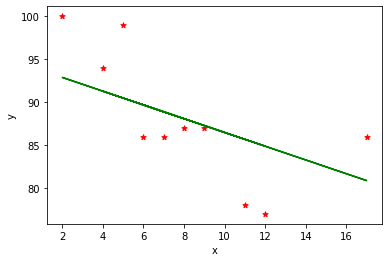

In [ ]:
b = find_b(df1["x1"],df1["y"])
print(b)
plot_regression_line(df1["x1"], df1["y"], b)

In [ ]:
'''Mean Square Error (MSE), R-square, and
Standard Error (SE)'''


''' R-square: it's tells us how well a regression line predict or estimate actual values '''
 
def R_square(x, y, b):
    #x = df1["x1"]

    #y = df1["y"]
    y_m = np.mean(y)

    #np.sum((y-y_m)**2)
    y_e = np.array((b[0] + b[1]*x))
    #print("y estimate value = ",y_e)
    #print(np.sum((y_e - y_m)**2))
    #print("******************************************************")
    voR_square = np.sum((y_e - y_m)**2)/np.sum((y-y_m)**2)
    return (1 - voR_square)

In [ ]:
# R-square
v_o_r_Square = R_square(df1["x1"], df1["y"], b)
print(v_o_r_Square)

0.7933132254989841


In [ ]:
'''Standard Error (SE) : distance(errors) b/w estimate value 
and actual value  sum of y estimate - y actual with square / number of observation - 2 all in root ''' 

def Standard_Error(x,y,b): 
  import math 
  y_e = np.array((b[0] + b[1]*x))  
  n = np.size(x)
  re = np.sum((y_e - y)**2)
  formula = re/(n-2)
  SE = math.sqrt(formula)
  #print("Standard Error (SE) : ",SE)
  return (SE)

In [ ]:
#Standard Error (SE)
Standard_Error(df1["x1"], df1["y"],b)

6.133760175583005

In [ ]:
'''Mean Square Error (MSE)'''
def Mean_Square_Error(x,y,b):
  import math 
  y_e = np.array((b[0] + b[1]*x))  
  n = np.size(x)
  re = np.sum((y_e - y)**2)
  mse = re/n
  return (mse)

In [ ]:
#Mean Square Error (MSE)
Mean_Square_Error(df1["x1"], df1["y"],b)

30.098411113254446

##For multi linear regression

In [ ]:
def least_squares_reg(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta
df1_b = least_squares_reg(df1_x,df1_y)
df1_b = df1_b.to_numpy()
df2_b = least_squares_reg(df2_x,df2_y)
# df2_b = df2_b.to_numpy()
df3_b = least_squares_reg(df3_x,df3_y)
# df3_b = df3_b.to_numpy()
print("value of b for data set 1")
df1_b

value of b for data set 1


array([[98.11914401],
       [-1.24927704]])

In [ ]:
# Value of b for data set 2
df2_b

array([2.42379757, 3.22628506, 0.619847  ])

In [ ]:
def y_est(x,b):
    x = x.to_numpy()
    
    if x.shape[1]>1:
        y_est = [b[0]]*len(x)
        for i in range(x.shape[0]):
            for j in range(1,x.shape[1]+1):
                y_est[i] += x[i][j-1]*b[j]
    elif x.shape[1]==1:
        # print("here")
        y_est = b[0] + b[1]*x
    return y_est
    # for i in range(x.shape[1]):
    #     np.array(b@x)
y_est(df2_x,df2_b)

[9.496214692704225,
 4.283338561442788,
 46.0979942787316,
 47.59178843479768,
 19.048019795026914,
 40.392321233771405,
 68.06214271334198,
 33.065803950578,
 30.45936588494728,
 21.03461086479174,
 12.468399589866541]

In [ ]:
def r_square(y_e,y):
    y_m = y.mean()
    r2 = np.sum((y_e-y)**2)/np.sum((y-y_m)**2)
    return 1 - r2

ye2 = y_est(df2_x,df2_b)
r2_2 = r_square(ye2,df2_y)
print("R-square for data set 2:",r2_2)


R-square for data set 2: 0.9958248969302885


In [ ]:
re3= y_est(df3_x,df3_b)
print("R-square for data set 3 :",r_square(ye3,df3_y))


R-square for data set 3 : 0.9952750025868807


In [ ]:
def Standard_Error(x,ye2,y): 
  import math 
  #y_e = np.array((b[0] + b[1]*x))  
  n = np.size(x)
  
  re = np.sum((ye2 - y)**2)
  formula = re/(n-2)
  SE = math.sqrt(formula)
  #print("Standard Error (SE) : ",SE)
  return (SE)

In [ ]:
print("Standard_Error for data set 2 :")
Standard_Error(df2_x,ye2,df2_y)

Standard_Error for data set 2 :


0.8835543916879893

In [ ]:
print("Standard_Error for data set 3 :")
Standard_Error(df3_x,ye3,df3_y)

Standard_Error for data set 3 :


0.9147631446620036

In [ ]:
def Mean_Square_Error(x,ye2,y):
  import math 
  #y_e = np.array((b[0] + b[1]*x))  
  n = np.size(x)
  re = np.sum((ye2 - y)**2)
  mse = re/n
  return (mse)

In [ ]:
print("Mean_Square_Error for data set 2")
Mean_Square_Error(df2_x,ye2,df2_y)

Mean_Square_Error for data set 2


0.709698511882848

In [ ]:
print("Mean_Square_Error for data set 3")
Mean_Square_Error(df3_x,ye3,df3_y)

Mean_Square_Error for data set 3


0.8088985571375206